In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Loading and Combinging Data

In [2]:
#loading salary data

dfSalary = pd.read_csv("Salary.csv")
dfSalary.head()

,First,Last,Salary
0,Stephen,Curry,45780966.0
1,James,Harden,44310840.0
2,John,Wall,44310840.0
3,Russell,Westbrook,44211146.0
4,Kevin,Durant,42018900.0


In [3]:
#loading player stats data

dfPlayer = pd.read_csv("playerStats2021.csv", encoding="latin1", delimiter= ";")
dfPlayer.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,C,22,TOR,73,28,23.6,3.6,8.3,...,0.595,2.0,4.5,6.5,1.1,0.5,0.6,1.2,2.1,9.1
1,2,Steven Adams,C,28,MEM,76,75,26.3,2.8,5.1,...,0.543,4.6,5.4,10.0,3.4,0.9,0.8,1.5,2.0,6.9
2,3,Bam Adebayo,C,24,MIA,56,56,32.6,7.3,13.0,...,0.753,2.4,7.6,10.1,3.4,1.4,0.8,2.6,3.1,19.1
3,4,Santi Aldama,PF,21,MEM,32,0,11.3,1.7,4.1,...,0.625,1.0,1.7,2.7,0.7,0.2,0.3,0.5,1.1,4.1
4,5,LaMarcus Aldridge,C,36,BRK,47,12,22.3,5.4,9.7,...,0.873,1.6,3.9,5.5,0.9,0.3,1.0,0.9,1.7,12.9


In [4]:
#combining data

# creating a common column to join by
dfSalary['Player'] = dfSalary['First'] + " " + dfSalary['Last']

# Merge DataFrames on a common column
dfCombined = pd.merge(dfSalary, dfPlayer, on='Player', how='inner')

# Handle duplicates or missing values if necessary
dfCombined.drop_duplicates(subset=['First', 'Last', 'Salary'], inplace=True)  # Drop duplicate rows
dfCombined.dropna(inplace=True)  # Drop rows with missing values

# drop new row
dfCombined.drop(columns=['Player'], inplace=True)
pd.set_option('display.max_columns', None)
dfCombined.head()

,First,Last,Salary,Rk,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Stephen,Curry,45780966.0,126,PG,33,GSW,64,64,34.5,8.4,19.1,0.437,4.5,11.7,0.380,3.9,7.4,0.527,0.554,4.3,4.7,0.923,0.5,4.7,5.2,6.3,1.3,0.4,3.2,2.0,25.5
1,James,Harden,44310840.0,218,PG-SG,32,TOT,65,65,37.2,6.3,15.3,0.410,2.3,6.9,0.330,4.0,8.4,0.476,0.485,7.2,8.2,0.877,0.8,6.8,7.7,10.3,1.3,0.6,4.4,2.4,22.0
4,Russell,Westbrook,44211146.0,576,PG,33,LAL,78,78,34.3,7.0,15.8,0.444,1.0,3.4,0.298,6.0,12.4,0.485,0.476,3.4,5.1,0.667,1.4,6.0,7.4,7.1,1.0,0.3,3.8,3.0,18.5
5,Kevin,Durant,42018900.0,154,PF,33,BRK,55,55,37.2,10.5,20.3,0.518,2.1,5.5,0.383,8.4,14.8,0.568,0.570,6.8,7.4,0.910,0.5,6.9,7.4,6.4,0.9,0.9,3.5,2.1,29.9
6,LeBron,James,41180544.0,274,SF,37,LAL,56,56,37.2,11.4,21.8,0.524,2.9,8.0,0.359,8.6,13.8,0.620,0.590,4.5,6.0,0.756,1.1,7.1,8.2,6.2,1.3,1.1,3.5,2.2,30.3


### Random Forest Regressor Model

In [5]:
X = dfCombined.drop(columns=['Salary', 'First', 'Last', 'Pos', 'Tm'])
y = dfCombined['Salary']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict on the test set
y_pred = rf.predict(X_test)

In [6]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R^2 Score: {r2}')

# Convert regression output to binary classification
threshold = y_train.median()  # Use median salary as the threshold

# Convert actual and predicted salaries to binary values
y_test_class = (y_test > threshold).astype(int)
y_pred_class = (y_pred > threshold).astype(int)

# Calculate accuracy for the binary classification
accuracy = accuracy_score(y_test_class, y_pred_class)
print(f'Classification Accuracy: {accuracy}')

Mean Squared Error: 40999725578411.47
Root Mean Squared Error: 6403102.80867108
R^2 Score: 0.6567473182696764
Classification Accuracy: 0.8018867924528302


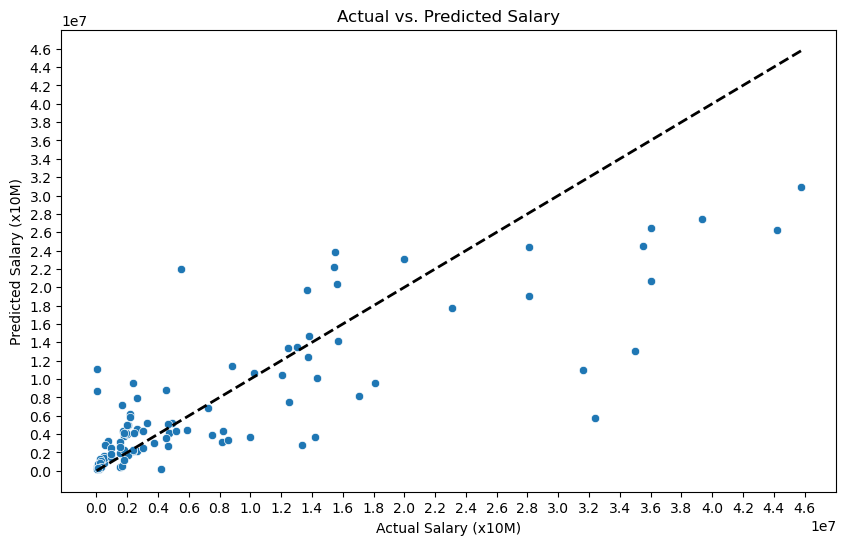

In [7]:
# Scatter plot of actual vs. predicted salaries
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Salary (x10M)')
plt.ylabel('Predicted Salary (x10M)')
plt.title('Actual vs. Predicted Salary')

# Set custom ticks for the x and y axes to increment by 2 million
max_salary = max(y_test.max(), y_pred.max())
ticks = np.arange(0, max_salary + 2000000, 2000000)
plt.xticks(ticks)
plt.yticks(ticks)

plt.show()

### Results
- This is the first verison of the Random Forest Regressor. It produced a RMSE of 6.4 Million which is 1.1 Million better than the basline of the basline of the logistic regression

### Ajust Salary Range based on Previous Notebooks

In [8]:
q1 = np.percentile(dfCombined['Salary'], 25)
q3 = np.percentile(dfCombined['Salary'], 75)
iqr = q3 - q1

# Calculate upperOutlier
upperOutlier = q3 + 1.5 * iqr

maxSal = upperOutlier

modf = dfCombined[dfCombined['Salary'] <= maxSal]
modf

,First,Last,Salary,Rk,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
60,Lonzo,Ball,18604651.0,26,PG,24,CHI,35,35,34.6,4.6,10.9,0.423,3.1,7.4,0.423,1.5,3.5,0.423,0.567,0.6,0.8,0.750,1.0,4.4,5.4,5.1,1.8,0.9,2.3,2.4,13.0
61,Domantas,Sabonis,18500000.0,488,C-PF,25,TOT,62,61,34.5,7.1,12.5,0.573,0.6,2.0,0.312,6.5,10.5,0.623,0.598,4.0,5.4,0.741,3.2,8.9,12.1,5.2,1.0,0.4,3.1,3.3,18.9
64,Eric,Gordon,18218818.0,199,SG,33,HOU,57,46,29.3,4.7,9.9,0.475,2.2,5.3,0.412,2.5,4.6,0.548,0.585,1.8,2.4,0.778,0.3,1.7,2.0,2.7,0.5,0.3,1.9,1.1,13.4
65,Eric,Bledsoe,18125000.0,52,PG,32,LAC,54,29,25.2,3.6,8.7,0.421,0.9,3.0,0.313,2.7,5.6,0.479,0.475,1.6,2.2,0.761,0.5,2.9,3.4,4.2,1.3,0.4,2.1,1.6,9.9
66,Myles,Turner,18000000.0,550,C,25,IND,42,42,29.4,4.8,9.4,0.509,1.5,4.4,0.333,3.3,5.0,0.662,0.587,1.9,2.5,0.752,1.5,5.5,7.1,1.0,0.7,2.8,1.3,2.8,12.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692,Micah,Potter,53176.0,456,C,23,DET,3,0,10.3,1.7,3.7,0.455,0.0,0.7,0.000,1.7,3.0,0.556,0.455,0.7,0.7,1.000,1.3,1.7,3.0,0.0,0.3,0.3,0.3,1.3,4.0
693,Trayvon,Palmer,53176.0,434,SG,27,DET,1,0,17.0,0.0,1.0,0.000,0.0,0.0,0.000,0.0,1.0,0.000,0.000,0.0,0.0,0.000,0.0,2.0,2.0,0.0,0.0,0.0,1.0,2.0,0.0
694,Tre,Scott,53176.0,494,SF,25,CLE,2,0,5.5,1.5,3.0,0.500,0.0,0.5,0.000,1.5,2.5,0.600,0.500,0.0,0.0,0.000,0.5,0.5,1.0,0.0,0.5,0.5,0.0,1.0,3.0
695,Zavier,Simpson,37223.0,505,PG,24,OKC,4,4,43.5,4.8,13.0,0.365,0.3,2.0,0.125,4.5,11.0,0.409,0.375,1.3,1.3,1.000,0.5,4.8,5.3,7.5,1.3,1.0,2.5,3.8,11.0


### Random Forest Regressor Model - Salaries Modified

In [9]:
X = modf.drop(columns=['Salary', 'First', 'Last', 'Pos', 'Tm'])
y = modf['Salary']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict on the test set
y_pred = rf.predict(X_test)

In [10]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R^2 Score: {r2}')

# Convert regression output to binary classification
threshold = y_train.median()  # Use median salary as the threshold

# Convert actual and predicted salaries to binary values
y_test_class = (y_test > threshold).astype(int)
y_pred_class = (y_pred > threshold).astype(int)

# Calculate accuracy for the binary classification
accuracy = accuracy_score(y_test_class, y_pred_class)
print(f'Classification Accuracy: {accuracy}')

Mean Squared Error: 8589478217711.448
Root Mean Squared Error: 2930781.161689055
R^2 Score: 0.625895934821631
Classification Accuracy: 0.8645833333333334


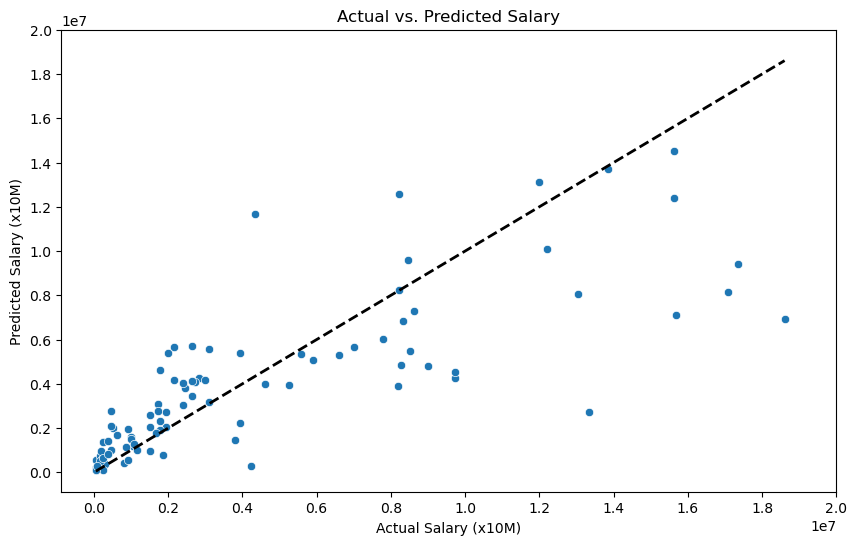

In [11]:
# Scatter plot of actual vs. predicted salaries
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Salary (x10M)')
plt.ylabel('Predicted Salary (x10M)')
plt.title('Actual vs. Predicted Salary')

# Set custom ticks for the x and y axes to increment by 2 million
max_salary = max(y_test.max(), y_pred.max())
ticks = np.arange(0, max_salary + 2000000, 2000000)
plt.xticks(ticks)
plt.yticks(ticks)

plt.show()

### Results

- By ajusting the range the model has improved the RMSE by over 50%. It is now down below 3 Million. This is the lowest RMSE any model has produced thus far.